In [2]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'n2o',
                          'band07_wn_1215_1380',
                          'P_50_T_250',
                          'min_4e-21_max_1e-17_ng_5',
                          'wgt_1_1_1_1_1',
                          'midlatitude_summer_tmp')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'n2o',
                               'band07_wn_1215_1380',
                               'P_50_T_250',
                               'min_4e-21_max_1e-17_ng_5',
                               'wgt_1_1_1_1_1',
                               'midlatitude_summer_tmp')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
fig.display_hrefanchor()

In [11]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [12]:
table_dgdgs.display_hrefanchor()

In [41]:
for g in [1, 2, 3, 4, 5]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

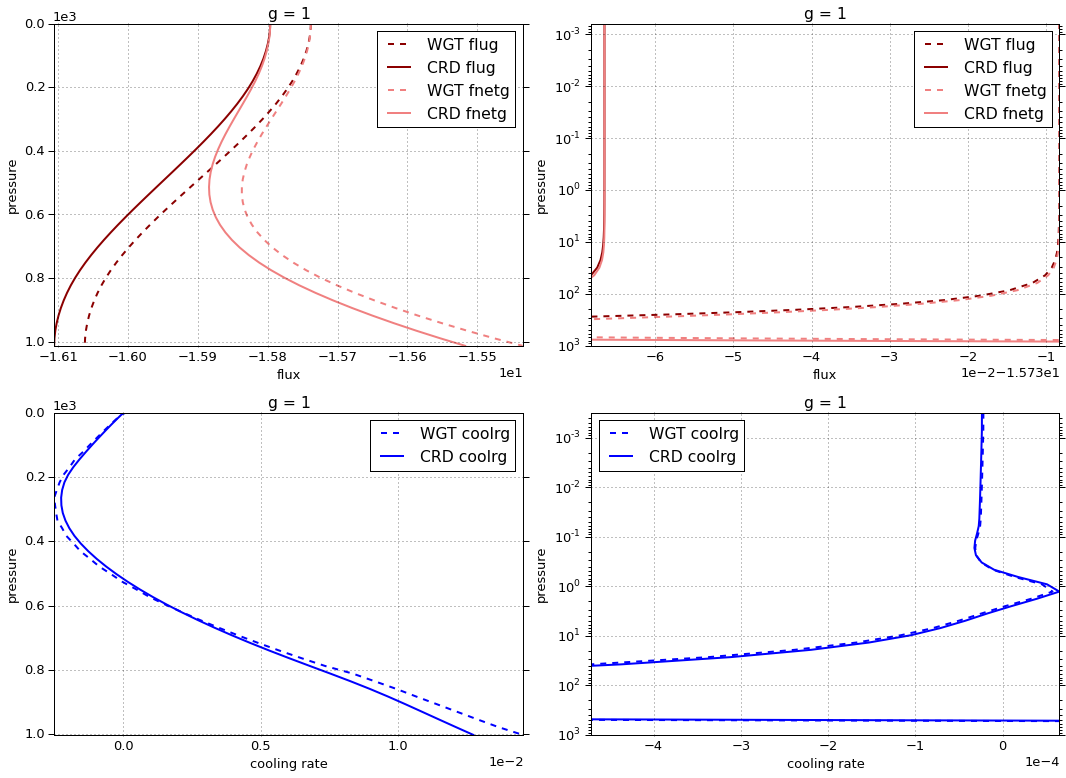

# Figure: flux, cooling rate. g-group 2

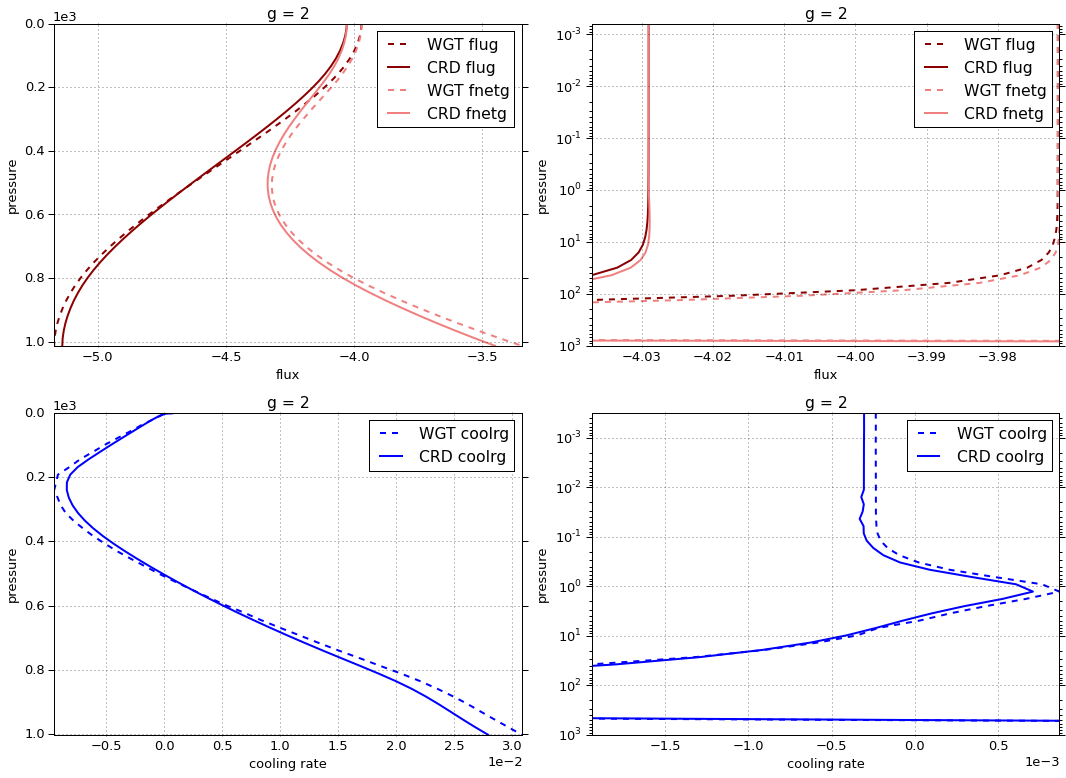

# Figure: flux, cooling rate. g-group 3

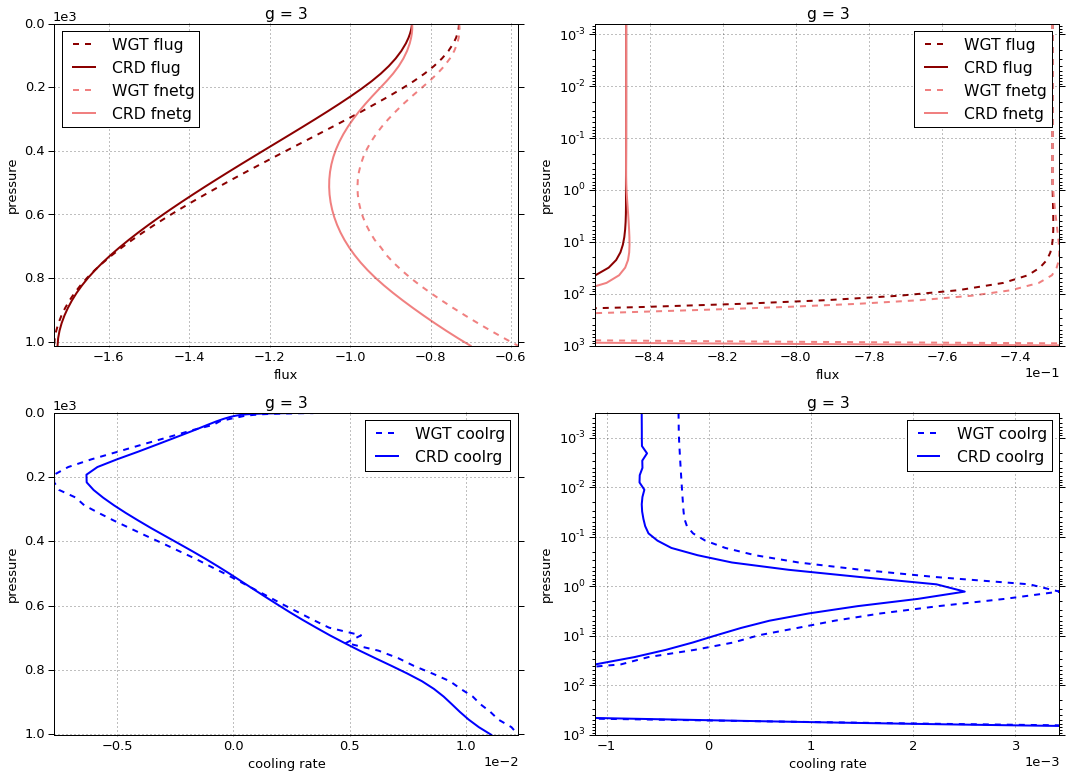

# Figure: flux, cooling rate. g-group 4

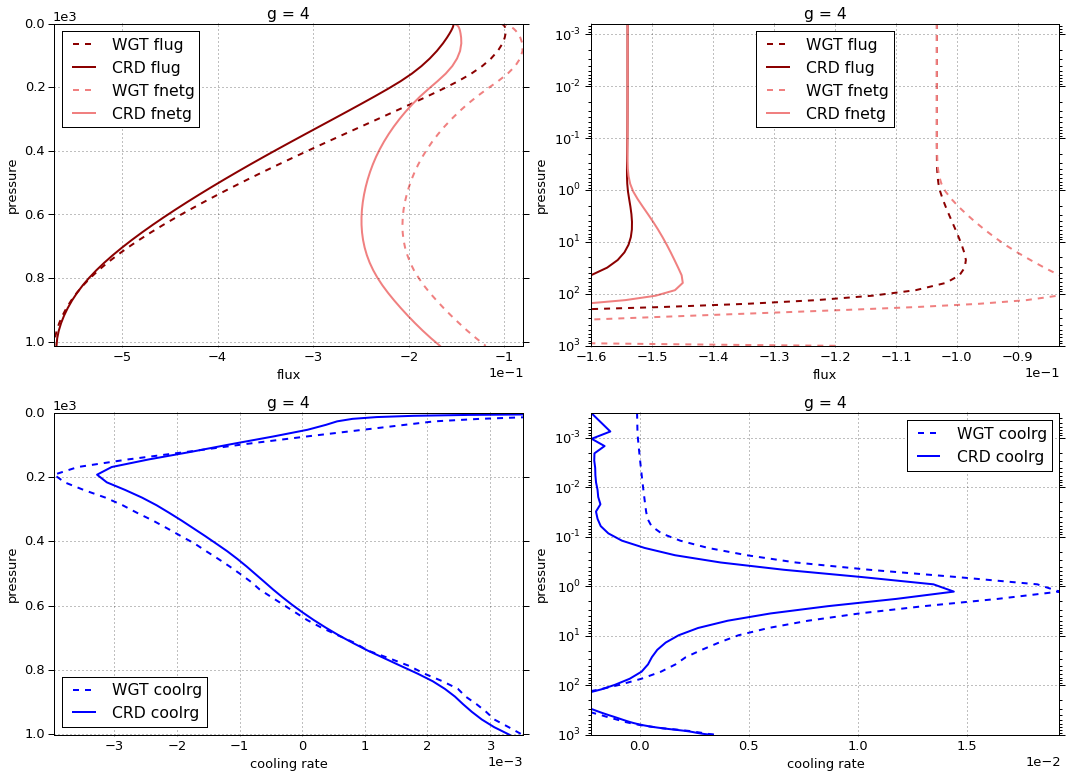

# Figure: flux, cooling rate. g-group 5

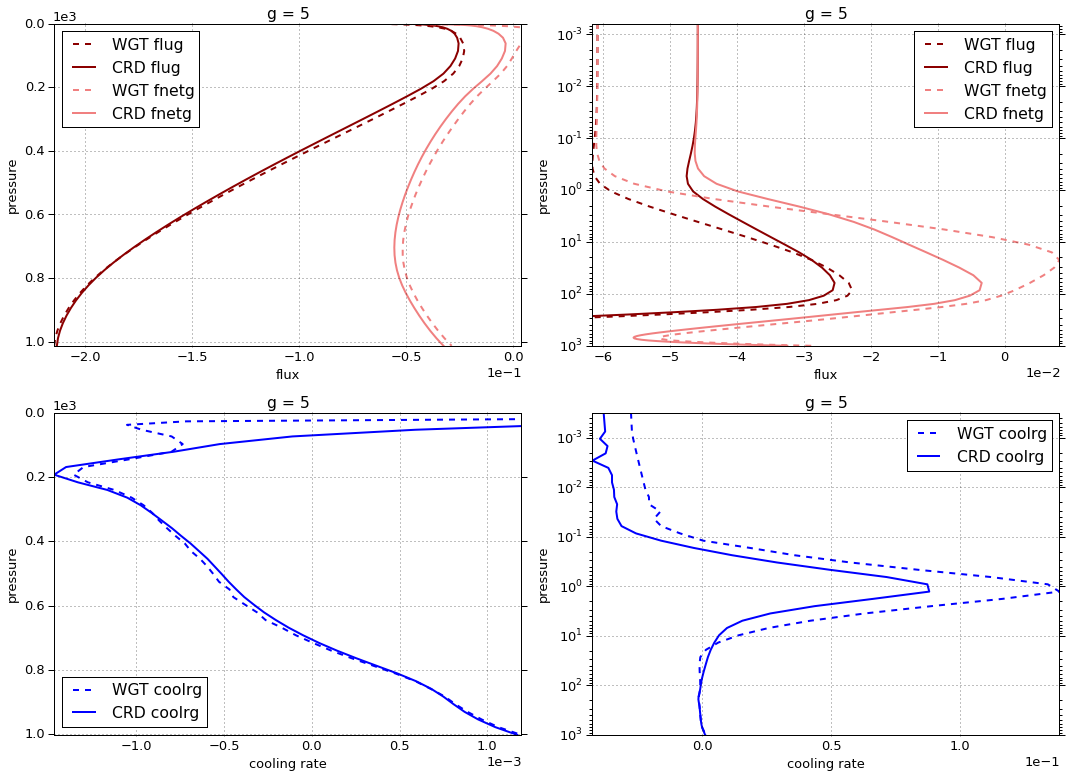

# Figure: flux, cooling rate. g-group total

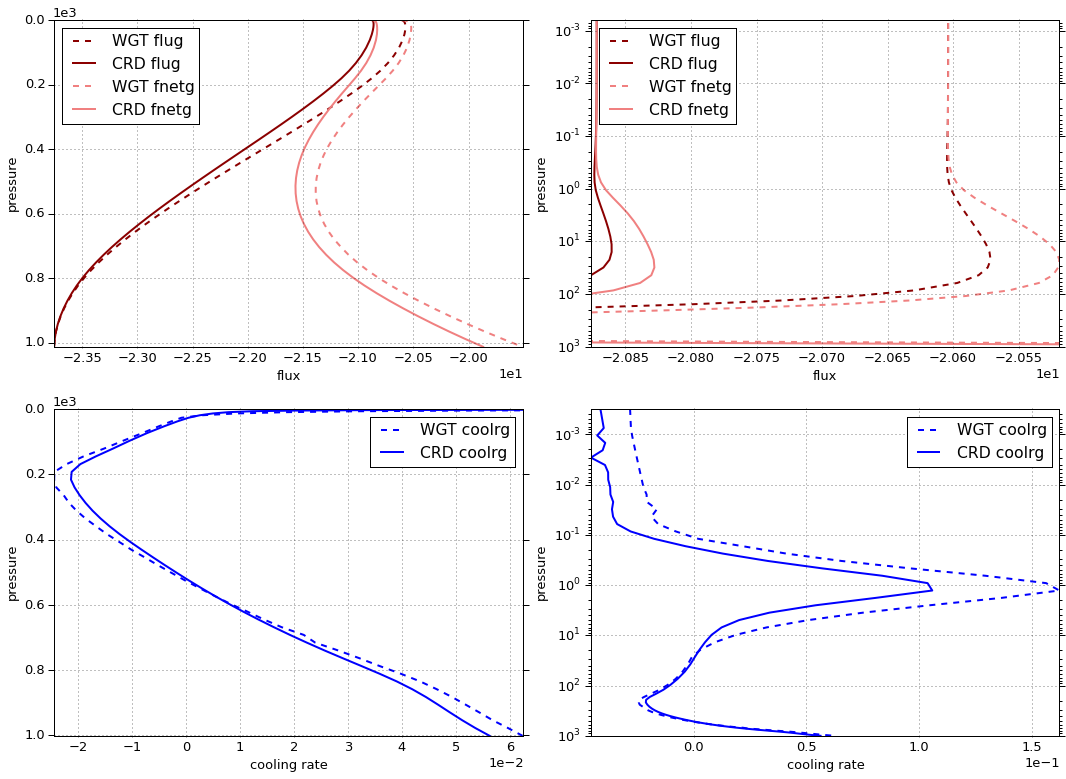

In [14]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [15]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -15.796510  0.000000 -15.796510
  1013     76    -16.105947  0.588631 -15.517316
2 0        1      -4.029012  0.000000  -4.029012
  1013     76     -5.139632  1.689383  -3.450250
3 0        1      -0.846453  0.000000  -0.846453
  1013     76     -1.727651  1.027208  -0.700443
4 0        1      -0.154066  0.000000  -0.154066
  1013     76     -0.568647  0.401283  -0.167363
5 0        1      -0.045888  0.000000  -0.045888
  1013     76     -0.213294  0.180788  -0.032505


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -15.738302  0.000000 -15.738302
  1013     76    -16.062046  0.626961 -15.435085
2 0        1      -3.971597  0.000000  -3.971597
  1013     76     -5.171342  1.826282  -3.345060
3 0        1      -0.729866  0.000000  -0.729866
  1013     76     -1.736102  1.153708  -0.582394
4 0        1      -0.103313  0.000000  -0.103313
  1013     76     -0.571108  0.451600  -0.119508
5 0        1      -0.060882  0.000000  -0.060882
  1013     76     -0.214572  0.185888  -0.028685


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.058208  0.000000  0.058208
  1013     76     0.043901  0.038329  0.082231
2 0        1      0.057414  0.000000  0.057414
  1013     76    -0.031710  0.136899  0.105190
3 0        1      0.116587  0.000000  0.116587
  1013     76    -0.008451  0.126500  0.118049
4 0        1      0.050753  0.000000  0.050753
  1013     76    -0.002462  0.050317  0.047855
5 0        1     -0.014994  0.000000 -0.014994
  1013     76    -0.001279  0.005099  0.003820

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000024
  1001.112500 75     0.012727
2 0.000312    1     -0.000305
  1001.112500 75     0.027955
3 0.000312    1     -0.000655
  1001.112500 75     0.011083
4 0.000312    1     -0.002232
  1001.112500 75     0.003319
5 0.000312    1     -0.038260
  1001.112500 75     0.001169


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000022
  1001.112500 75     0.014524
2 0.000312    1     -0.000235
  1001.112500 75     0.030877
3 0.000312    1     -0.000294
  1001.112500 75     0.012236
4 0.000312    1     -0.000119
  1001.112500 75     0.003526
5 0.000312    1     -0.027637
  1001.112500 75     0.001192


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1      0.000002
  1001.112500 75     0.001797
2 0.000312    1      0.000070
  1001.112500 75     0.002922
3 0.000312    1      0.000361
  1001.112500 75     0.001153
4 0.000312    1      0.002113
  1001.112500 75     0.000208
5 0.000312    1      0.010624
  1001.112500 75     0.000023

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.871928,0.000000,-20.871928
1013,76,-23.755170,3.887293,-19.867877



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.603961,0.000000,-20.603961
1013,76,-23.755171,4.244438,-19.510732



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,2.679676e-01,0.000000,0.267968
1013,76,-2.000000e-07,0.357144,0.357145


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.041477
1001.112500,75,0.056253



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.028307
1001.112500,75,0.062355



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.013170
1001.112500,75,0.006103


In [16]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.686545,0.676149
2,0.210364,0.217693
3,0.070970,0.073083
4,0.023394,0.024041
5,0.008727,0.009033


In [36]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

wgt                                           crd        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -15.738302  0.000000e+00 -15.738302   1     1   
0.000624      1     2 -15.738302  1.640012e-10 -15.738302   1     2   
0.000876      1     3 -15.738302  2.313540e-10 -15.738302   1     3   
0.001229      1     4 -15.738302  3.286801e-10 -15.738302   1     4   
0.001723      1     5 -15.738302  4.702402e-10 -15.738302   1     5   
0.002417      1     6 -15.738302  6.761901e-10 -15.738302   1     6   
0.003391      1     7 -15.738302  9.758881e-10 -15.738302   1     7   
0.004757      1     8 -15.738302  1.412093e-09 -15.738302   1     8   
0.006672      1     9 -15.738302  2.047093e-09 -15.738302   1     9   
0.009359      1    10 -15.738302  2.971816e-09 -15.738302   1    10   
0.013128      1    11 -15.738302  4.319052e-09 -15.738302   1    11   
0.018415      1    12 -15.738302  6.283127e-09 -15.738302   1    12   
0.025830      1    13 -15.738302  9.148986e-09 -15.738302   1    13   
0.036232      1    14 -15.738302  1.333712e-08 -15.738302   1    14   
0.050823      1    15 -15.738302  1.953775e-08 -15.738302   1    15   
0.071291      1    16 -15.738302  2.948733e-08 -15.738302   1    16   
0.100000      1    17 -15.738302  4.832316e-08 -15.738302   1    17   
0.140271      1    18 -15.738302  8.849001e-08 -15.738302   1    18   
0.196760      1    19 -15.738302  1.763547e-07 -15.738302   1    19   
0.275997      1    20 -15.738303  3.691202e-07 -15.738303   1    20   
0.387100      1    21 -15.738304  7.920474e-07 -15.738303   1    21   
0.543100      1    22 -15.738305  1.719781e-06 -15.738303   1    22   
0.761700      1    23 -15.738306  3.721791e-06 -15.738303   1    23   
1.068500      1    24 -15.738309  7.637288e-06 -15.738301   1    24   
1.498800      1    25 -15.738312  1.370099e-05 -15.738298   1    25   
2.102400      1    26 -15.738317  2.101872e-05 -15.738296   1    26   
2.949000      1    27 -15.738325  2.944712e-05 -15.738296   1    27   
4.136600      1    28 -15.738338  3.938515e-05 -15.738299   1    28   
5.802500      1    29 -15.738361  5.173363e-05 -15.738309   1    29   
8.139200      1    30 -15.738399  6.807741e-05 -15.738331   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -15.817609  1.583321e-02 -15.801776   1    47   
347.300000    1    48 -15.828423  1.992140e-02 -15.808502   1    48   
371.075000    1    49 -15.839520  2.477622e-02 -15.814743   1    49   
394.850000    1    50 -15.851027  3.046725e-02 -15.820560   1    50   
418.625000    1    51 -15.862691  3.705918e-02 -15.825632   1    51   
442.400000    1    52 -15.874619  4.461395e-02 -15.830005   1    52   
466.175000    1    53 -15.886579  5.318881e-02 -15.833390   1    53   
489.950000    1    54 -15.898676  6.283665e-02 -15.835839   1    54   
513.725000    1    55 -15.910682  7.360794e-02 -15.837074   1    55   
537.500000    1    56 -15.922707  8.555260e-02 -15.837154   1    56   
561.275000    1    57 -15.934514  9.872053e-02 -15.835793   1    57   
585.050000    1    58 -15.946227  1.131614e-01 -15.833065   1    58   
608.825000    1    59 -15.957638  1.289241e-01 -15.828714   1    59   
632.600000    1    60 -15.968689  1.460561e-01 -15.822633   1    60   
656.375000    1    61 -15.979360  1.646036e-01 -15.814757   1    61   
680.150000    1    62 -15.989582  1.846078e-01 -15.804974   1    62   
703.925000    1    63 -15.999295  2.060812e-01 -15.793213   1    63   
727.700000    1    64 -16.008441  2.290694e-01 -15.779371   1    64   
751.475000    1    65 -16.016957  2.536044e-01 -15.763352   1    65   
775.250000    1    66 -16.024785  2.797381e-01 -15.745047   1    66   
799.025000    1    67 -16.031875  3.075027e-01 -15.724373   1    67   
822.800000    1    68 -16.038197  3.373436e-01 -15.700853   1    68   
846.575000    1    69 -16.043742  3.

In [37]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      2     1 -3.971597  0.000000e+00 -3.971597   2     1 -4.029012   
0.000624      2     2 -3.971597  2.758988e-09 -3.971597   2     2 -4.029012   
0.000876      2     3 -3.971597  3.888610e-09 -3.971597   2     3 -4.029012   
0.001229      2     4 -3.971597  5.510726e-09 -3.971597   2     4 -4.029012   
0.001723      2     5 -3.971597  7.854372e-09 -3.971597   2     5 -4.029012   
0.002417      2     6 -3.971597  1.124111e-08 -3.971597   2     6 -4.029012   
0.003391      2     7 -3.971597  1.613597e-08 -3.971597   2     7 -4.029012   
0.004757      2     8 -3.971598  2.321116e-08 -3.971597   2     8 -4.029012   
0.006672      2     9 -3.971598  3.343819e-08 -3.971598   2     9 -4.029012   
0.009359      2    10 -3.971598  4.822364e-08 -3.971598   2    10 -4.029012   
0.013128      2    11 -3.971598  6.960331e-08 -3.971598   2    11 -4.029012   
0.018415      2    12 -3.971598  1.005274e-07 -3.971598   2    12 -4.029012   
0.025830      2    13 -3.971598  1.452748e-07 -3.971598   2    13 -4.029013   
0.036232      2    14 -3.971599  2.100818e-07 -3.971598   2    14 -4.029013   
0.050823      2    15 -3.971599  3.050452e-07 -3.971599   2    15 -4.029014   
0.071291      2    16 -3.971600  4.536929e-07 -3.971599   2    16 -4.029015   
0.100000      2    17 -3.971601  7.188051e-07 -3.971600   2    17 -4.029016   
0.140271      2    18 -3.971602  1.239158e-06 -3.971601   2    18 -4.029018   
0.196760      2    19 -3.971604  2.284204e-06 -3.971602   2    19 -4.029021   
0.275997      2    20 -3.971607  4.388009e-06 -3.971603   2    20 -4.029025   
0.387100      2    21 -3.971611  8.623150e-06 -3.971603   2    21 -4.029030   
0.543100      2    22 -3.971616  1.715066e-05 -3.971599   2    22 -4.029037   
0.761700      2    23 -3.971621  3.406224e-05 -3.971586   2    23 -4.029045   
1.068500      2    24 -3.971624  6.495164e-05 -3.971559   2    24 -4.029054   
1.498800      2    25 -3.971626  1.118620e-04 -3.971514   2    25 -4.029065   
2.102400      2    26 -3.971636  1.695158e-04 -3.971467   2    26 -4.029086   
2.949000      2    27 -3.971661  2.370814e-04 -3.971424   2    27 -4.029124   
4.136600      2    28 -3.971711  3.170562e-04 -3.971394   2    28 -4.029191   
5.802500      2    29 -3.971805  4.152887e-04 -3.971389   2    29 -4.029305   
8.139200      2    30 -3.971993  5.421715e-04 -3.971451   2    30 -4.029498   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    2    47 -4.309834  8.734128e-02 -4.222492   2    47 -4.338811   
347.300000    2    48 -4.351626  1.070132e-01 -4.244613   2    48 -4.377020   
371.075000    2    49 -4.394099  1.296515e-01 -4.264447   2    49 -4.415963   
394.850000    2    50 -4.437113  1.553032e-01 -4.281810   2    50 -4.455426   
418.625000    2    51 -4.480411  1.840874e-01 -4.296323   2    51 -4.495188   
442.400000    2    52 -4.523848  2.160250e-01 -4.307824   2    52 -4.535061   
466.175000    2    53 -4.567137  2.511924e-01 -4.315944   2    53 -4.574879   
489.950000    2    54 -4.610147  2.895894e-01 -4.320557   2    54 -4.614491   
513.725000    2    55 -4.652748  3.310763e-01 -4.321671   2    55 -4.653754   
537.500000    2    56 -4.694743  3.757365e-01 -4.319006   2    56 -4.692523   
561.275000    2    57 -4.735934  4.234849e-01 -4.312449   2    57 -4.730648   
585.050000    2    58 -4.776158  4.743230e-01 -4.301835   2    58 -4.767972   
608.825000    2    59 -4.815383  5.282017e-01 -4.287181   2    59 -4.804338   
632.600000    2    60 -4.853243  5.852979e-01 -4.267945   2    60 -4.839585   
656.375000    2    61 -4.889681  6.452186e-01 -4.244462   2    61 -4.873548   
680.150000    2    62 -4.924487  7.080981e-01 -4.216389   2    62 -4.906054   
703.925000    2    63 -4.957441  7.738991e-01 -4.183542   2   

In [38]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      3     1 -0.729866  0.000000e+00 -0.729866   3     1 -0.846453   
0.000624      3     2 -0.729866  8.788561e-09 -0.729866   3     2 -0.846453   
0.000876      3     3 -0.729866  1.238542e-08 -0.729866   3     3 -0.846453   
0.001229      3     4 -0.729866  1.754621e-08 -0.729866   3     4 -0.846453   
0.001723      3     5 -0.729867  2.499593e-08 -0.729866   3     5 -0.846453   
0.002417      3     6 -0.729867  3.575149e-08 -0.729867   3     6 -0.846453   
0.003391      3     7 -0.729867  5.128182e-08 -0.729867   3     7 -0.846453   
0.004757      3     8 -0.729867  7.370782e-08 -0.729867   3     8 -0.846454   
0.006672      3     9 -0.729867  1.060907e-07 -0.729867   3     9 -0.846454   
0.009359      3    10 -0.729867  1.528563e-07 -0.729867   3    10 -0.846454   
0.013128      3    11 -0.729867  2.203997e-07 -0.729867   3    11 -0.846454   
0.018415      3    12 -0.729867  3.179713e-07 -0.729867   3    12 -0.846455   
0.025830      3    13 -0.729868  4.589573e-07 -0.729867   3    13 -0.846456   
0.036232      3    14 -0.729868  6.628156e-07 -0.729868   3    14 -0.846457   
0.050823      3    15 -0.729869  9.609560e-07 -0.729868   3    15 -0.846458   
0.071291      3    16 -0.729870  1.425638e-06 -0.729868   3    16 -0.846460   
0.100000      3    17 -0.729871  2.245846e-06 -0.729869   3    17 -0.846463   
0.140271      3    18 -0.729873  3.830034e-06 -0.729869   3    18 -0.846467   
0.196760      3    19 -0.729875  6.951557e-06 -0.729868   3    19 -0.846472   
0.275997      3    20 -0.729877  1.309984e-05 -0.729864   3    20 -0.846480   
0.387100      3    21 -0.729877  2.517696e-05 -0.729852   3    21 -0.846489   
0.543100      3    22 -0.729873  4.884650e-05 -0.729825   3    22 -0.846498   
0.761700      3    23 -0.729861  9.444480e-05 -0.729767   3    23 -0.846505   
1.068500      3    24 -0.729828  1.756728e-04 -0.729653   3    24 -0.846505   
1.498800      3    25 -0.729776  2.981731e-04 -0.729478   3    25 -0.846499   
2.102400      3    26 -0.729720  4.498162e-04 -0.729270   3    26 -0.846502   
2.949000      3    27 -0.729673  6.285165e-04 -0.729044   3    27 -0.846531   
4.136600      3    28 -0.729647  8.396934e-04 -0.728807   3    28 -0.846600   
5.802500      3    29 -0.729660  1.096457e-03 -0.728564   3    29 -0.846732   
8.139200      3    30 -0.729746  1.422191e-03 -0.728323   3    30 -0.846962   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    3    47 -1.042758  1.217131e-01 -0.921045   3    47 -1.116851   
347.300000    3    48 -1.078958  1.434526e-01 -0.935506   3    48 -1.147755   
371.075000    3    49 -1.115295  1.672814e-01 -0.948014   3    49 -1.178870   
394.850000    3    50 -1.151635  1.930764e-01 -0.958558   3    50 -1.210026   
418.625000    3    51 -1.187751  2.206827e-01 -0.967068   3    51 -1.241083   
442.400000    3    52 -1.223553  2.499380e-01 -0.973615   3    52 -1.271925   
466.175000    3    53 -1.258925  2.807446e-01 -0.978180   3    53 -1.302450   
489.950000    3    54 -1.293739  3.127985e-01 -0.980941   3    54 -1.332591   
513.725000    3    55 -1.327932  3.460776e-01 -0.981854   3    55 -1.362283   
537.500000    3    56 -1.361428  3.804079e-01 -0.981020   3    56 -1.391454   
561.275000    3    57 -1.394133  4.157028e-01 -0.978430   3    57 -1.420028   
585.050000    3    58 -1.425948  4.518538e-01 -0.974094   3    58 -1.447925   
608.825000    3    59 -1.456770  4.887407e-01 -0.968030   3    59 -1.475049   
632.600000    3    60 -1.486502  5.263513e-01 -0.960151   3    60 -1.501311   
656.375000    3    61 -1.515024  5.645683e-01 -0.950455   3    61 -1.526607   
680.150000    3    62 -1.542218  6.033502e-01 -0.938868   3    62 -1.550829   
703.925000    3    63 -1.567963  6.445521e-01 -0.923411   3   

In [39]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -0.103313  0.000000e+00 -0.103313   4     1 -0.154066   
0.000624      4     2 -0.103313  5.068498e-08 -0.103313   4     2 -0.154066   
0.000876      4     3 -0.103313  7.143415e-08 -0.103313   4     3 -0.154066   
0.001229      4     4 -0.103313  1.012238e-07 -0.103313   4     4 -0.154066   
0.001723      4     5 -0.103313  1.442520e-07 -0.103313   4     5 -0.154066   
0.002417      4     6 -0.103313  2.064082e-07 -0.103313   4     6 -0.154066   
0.003391      4     7 -0.103313  2.962002e-07 -0.103313   4     7 -0.154067   
0.004757      4     8 -0.103313  4.259117e-07 -0.103313   4     8 -0.154067   
0.006672      4     9 -0.103313  6.132674e-07 -0.103312   4     9 -0.154068   
0.009359      4    10 -0.103313  8.838793e-07 -0.103312   4    10 -0.154069   
0.013128      4    11 -0.103314  1.274723e-06 -0.103312   4    11 -0.154070   
0.018415      4    12 -0.103314  1.839209e-06 -0.103312   4    12 -0.154072   
0.025830      4    13 -0.103315  2.654468e-06 -0.103312   4    13 -0.154074   
0.036232      4    14 -0.103315  3.832294e-06 -0.103312   4    14 -0.154078   
0.050823      4    15 -0.103317  5.552580e-06 -0.103311   4    15 -0.154083   
0.071291      4    16 -0.103318  8.229573e-06 -0.103310   4    16 -0.154090   
0.100000      4    17 -0.103319  1.293985e-05 -0.103306   4    17 -0.154100   
0.140271      4    18 -0.103319  2.195775e-05 -0.103297   4    18 -0.154112   
0.196760      4    19 -0.103316  3.945353e-05 -0.103276   4    19 -0.154128   
0.275997      4    20 -0.103304  7.316223e-05 -0.103230   4    20 -0.154147   
0.387100      4    21 -0.103274  1.375191e-04 -0.103136   4    21 -0.154162   
0.543100      4    22 -0.103201  2.593476e-04 -0.102942   4    22 -0.154160   
0.761700      4    23 -0.103050  4.846752e-04 -0.102565   4    23 -0.154117   
1.068500      4    24 -0.102773  8.700243e-04 -0.101903   4    24 -0.154000   
1.498800      4    25 -0.102359  1.435966e-03 -0.100923   4    25 -0.153805   
2.102400      4    26 -0.101872  2.122878e-03 -0.099750   4    26 -0.153598   
2.949000      4    27 -0.101350  2.905853e-03 -0.098444   4    27 -0.153431   
4.136600      4    28 -0.100808  3.780685e-03 -0.097027   4    28 -0.153340   
5.802500      4    29 -0.100264  4.759518e-03 -0.095504   4    29 -0.153359   
8.139200      4    30 -0.099741  5.870818e-03 -0.093870   4    30 -0.153530   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -0.249895  8.727795e-02 -0.162617   4    47 -0.293640   
347.300000    4    48 -0.267444  9.811028e-02 -0.169333   4    48 -0.308316   
371.075000    4    49 -0.284903  1.094873e-01 -0.175416   4    49 -0.322921   
394.850000    4    50 -0.302208  1.213225e-01 -0.180885   4    50 -0.337394   
418.625000    4    51 -0.319267  1.335402e-01 -0.185727   4    51 -0.351683   
442.400000    4    52 -0.336052  1.460056e-01 -0.190046   4    52 -0.365745   
466.175000    4    53 -0.352531  1.587067e-01 -0.193825   4    53 -0.379557   
489.950000    4    54 -0.368652  1.715661e-01 -0.197086   4    54 -0.393103   
513.725000    4    55 -0.384396  1.845380e-01 -0.199858   4    55 -0.406380   
537.500000    4    56 -0.399783  1.976195e-01 -0.202163   4    56 -0.419365   
561.275000    4    57 -0.414750  2.106737e-01 -0.204076   4    57 -0.432050   
585.050000    4    58 -0.429278  2.238209e-01 -0.205457   4    58 -0.444397   
608.825000    4    59 -0.443334  2.370333e-01 -0.206301   4    59 -0.456388   
632.600000    4    60 -0.456887  2.502807e-01 -0.206606   4    60 -0.467986   
656.375000    4    61 -0.469859  2.634827e-01 -0.206377   4    61 -0.479156   
680.150000    4    62 -0.482244  2.767447e-01 -0.205499   4    62 -0.489848   
703.925000    4    63 -0.493958  2.900811e-01 -0.203877   4   

In [40]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 5

wgt                                     crd                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      5     1 -0.060882  0.000000 -0.060882   5     1 -0.045888   
0.000624      5     2 -0.060885  0.000001 -0.060884   5     2 -0.045892   
0.000876      5     3 -0.060887  0.000001 -0.060885   5     3 -0.045893   
0.001229      5     4 -0.060888  0.000002 -0.060886   5     4 -0.045896   
0.001723      5     5 -0.060891  0.000003 -0.060888   5     5 -0.045899   
0.002417      5     6 -0.060894  0.000004 -0.060890   5     6 -0.045903   
0.003391      5     7 -0.060899  0.000006 -0.060893   5     7 -0.045910   
0.004757      5     8 -0.060905  0.000009 -0.060897   5     8 -0.045918   
0.006672      5     9 -0.060914  0.000012 -0.060902   5     9 -0.045930   
0.009359      5    10 -0.060927  0.000017 -0.060909   5    10 -0.045946   
0.013128      5    11 -0.060944  0.000025 -0.060919   5    11 -0.045969   
0.018415      5    12 -0.060968  0.000036 -0.060932   5    12 -0.046000   
0.025830      5    13 -0.061001  0.000051 -0.060950   5    13 -0.046044   
0.036232      5    14 -0.061043  0.000073 -0.060970   5    14 -0.046107   
0.050823      5    15 -0.061107  0.000105 -0.061002   5    15 -0.046194   
0.071291      5    16 -0.061194  0.000153 -0.061041   5    16 -0.046315   
0.100000      5    17 -0.061303  0.000233 -0.061070   5    17 -0.046475   
0.140271      5    18 -0.061440  0.000371 -0.061068   5    18 -0.046678   
0.196760      5    19 -0.061560  0.000616 -0.060944   5    19 -0.046920   
0.275997      5    20 -0.061650  0.001043 -0.060607   5    20 -0.047187   
0.387100      5    21 -0.061627  0.001777 -0.059849   5    21 -0.047436   
0.543100      5    22 -0.061335  0.003035 -0.058300   5    22 -0.047563   
0.761700      5    23 -0.060516  0.005120 -0.055396   5    23 -0.047365   
1.068500      5    24 -0.058867  0.008349 -0.050518   5    24 -0.046598   
1.498800      5    25 -0.056253  0.012804 -0.043449   5    25 -0.045121   
2.102400      5    26 -0.053070  0.017952 -0.035117   5    26 -0.043282   
2.949000      5    27 -0.049549  0.023352 -0.026196   5    27 -0.041269   
4.136600      5    28 -0.045880  0.028570 -0.017310   5    28 -0.039188   
5.802500      5    29 -0.042170  0.033156 -0.009014   5    29 -0.037084   
8.139200      5    30 -0.038515  0.036641 -0.001874   5    30 -0.034965   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    5    47 -0.072568  0.044441 -0.028126   5    47 -0.077114   
347.300000    5    48 -0.079766  0.049191 -0.030575   5    48 -0.084100   
371.075000    5    49 -0.086967  0.054069 -0.032898   5    49 -0.091062   
394.850000    5    50 -0.094135  0.059050 -0.035084   5    50 -0.097990   
418.625000    5    51 -0.101233  0.064112 -0.037121   5    51 -0.104846   
442.400000    5    52 -0.108265  0.069207 -0.039058   5    52 -0.111611   
466.175000    5    53 -0.115188  0.074338 -0.040850   5    53 -0.118267   
489.950000    5    54 -0.121994  0.079467 -0.042526   5    54 -0.124814   
513.725000    5    55 -0.128701  0.084596 -0.044105   5    55 -0.131244   
537.500000    5    56 -0.135313  0.089719 -0.045593   5    56 -0.137554   
561.275000    5    57 -0.141759  0.094846 -0.046913   5    57 -0.143738   
585.050000    5    58 -0.148121  0.099949 -0.048171   5    58 -0.149790   
608.825000    5    59 -0.154293  0.105052 -0.049241   5    59 -0.155690   
632.600000    5    60 -0.160297  0.110179 -0.050118   5    60 -0.161426   
656.375000    5    61 -0.166147  0.115287 -0.050860   5    61 -0.166977   
680.150000    5    62 -0.171740  0.120399 -0.051341   5    62 -0.172323   
703.925000    5    63 -0.177105  0.125511 -0.051594   5    63 -0.177438   
727.700000    5    64 -0.182205  0.130633 -0.051572   5    64 -0.182297   
751.475000    5    65 -0.186999  0.135740 -0.051259   5    65 -0.186867   
775.250000    5    66 -0.191451  0.14

In [42]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')